In [47]:
# Importing necessary libraries
import pandas as pd

# Loading the dataset
file_path = "Student Performance Dataset.csv"
df = pd.read_csv(file_path)

# Displaying the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Math Score  Reading Score  Writing Score  Attendance Rate  \
0          51             12             81            68.10   
1          92             83             94            98.32   
2          14             24             37            74.72   
3          71             67             31            73.08   
4          60              9             10            65.96   

   Extracurricular Activities  Study Hours Per Week  Project Scores  
0                           3                     8               1  
1                           3                    12              39  
2                           3                    29               2  
3                           5                    17              34  
4                           2                    36              32  


In [48]:
# Showing dataset summary
print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Math Score                  1007 non-null   int64  
 1   Reading Score               1007 non-null   int64  
 2   Writing Score               1007 non-null   int64  
 3   Attendance Rate             1007 non-null   float64
 4   Extracurricular Activities  1007 non-null   int64  
 5   Study Hours Per Week        1007 non-null   int64  
 6   Project Scores              1007 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 55.2 KB
None


In [49]:
# Checking basic statistics
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
        Math Score  Reading Score  Writing Score  Attendance Rate  \
count  1007.000000    1007.000000    1007.000000      1007.000000   
mean     49.916584      49.710030      48.126117        79.822890   
std      29.982118      29.573296      29.699606        11.583551   
min       0.000000       0.000000       0.000000        60.000000   
25%      23.000000      24.000000      22.000000        70.370000   
50%      50.000000      50.000000      46.000000        79.690000   
75%      76.000000      75.000000      75.000000        90.100000   
max     100.000000     100.000000     100.000000        99.930000   

       Extracurricular Activities  Study Hours Per Week  Project Scores  
count                 1007.000000           1007.000000     1007.000000  
mean                     2.500497             22.579940       24.220457  
std                      1.725654             10.094549       14.437328  
min                      0.000000              5.000000     

In [50]:
# Checking for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
Math Score                    0
Reading Score                 0
Writing Score                 0
Attendance Rate               0
Extracurricular Activities    0
Study Hours Per Week          0
Project Scores                0
dtype: int64


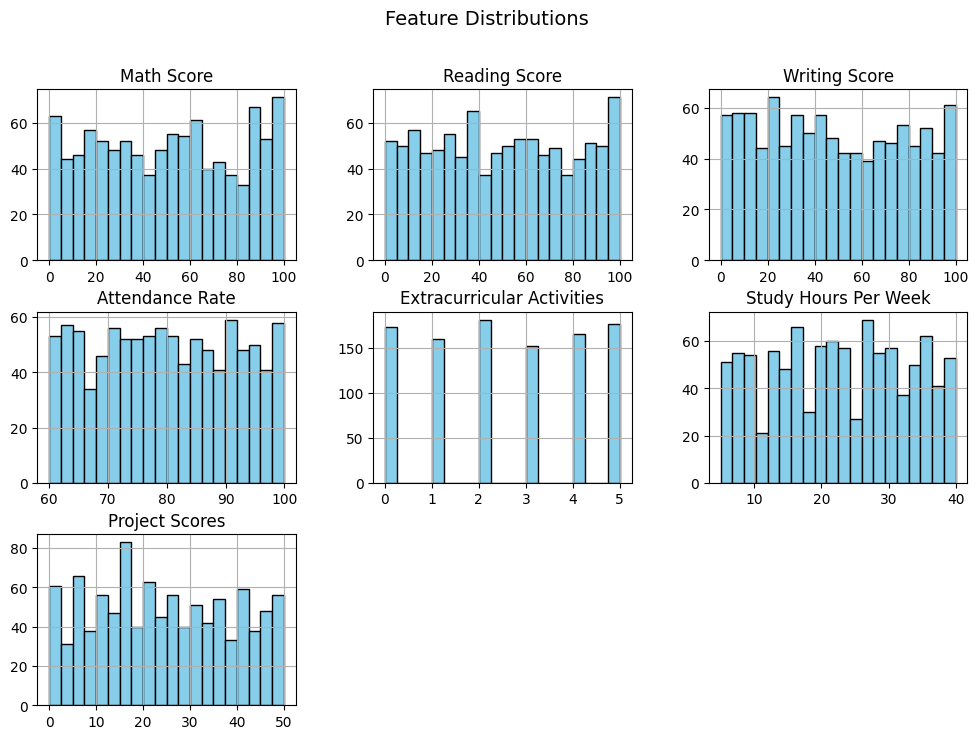

In [51]:
# Plotting histograms for numerical features
df.hist(figsize=(12, 8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

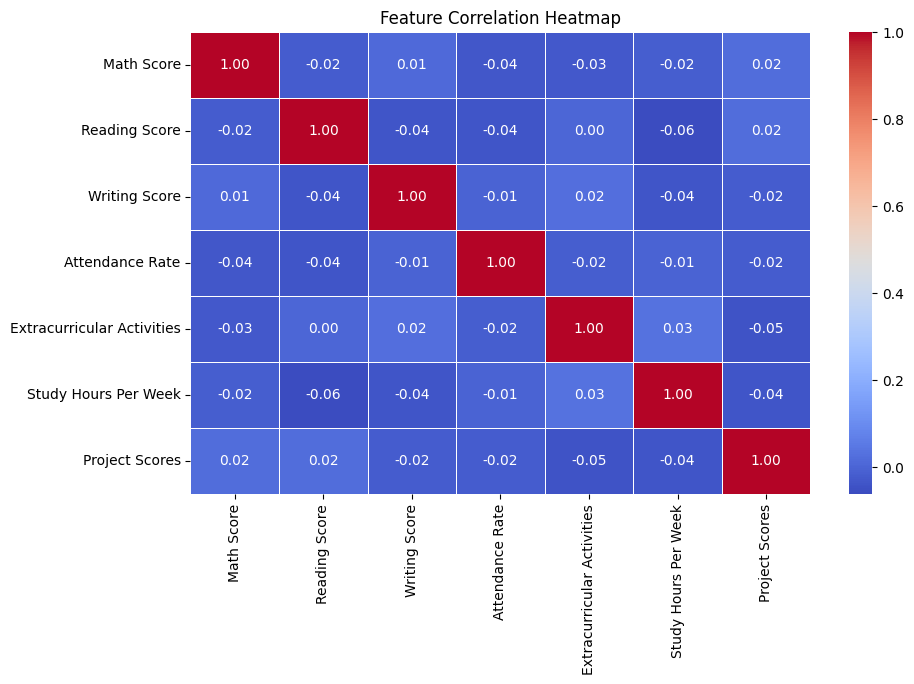

In [52]:
# Computing correlation matrix
correlation_matrix = df.corr()

# Visualizing correlation using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

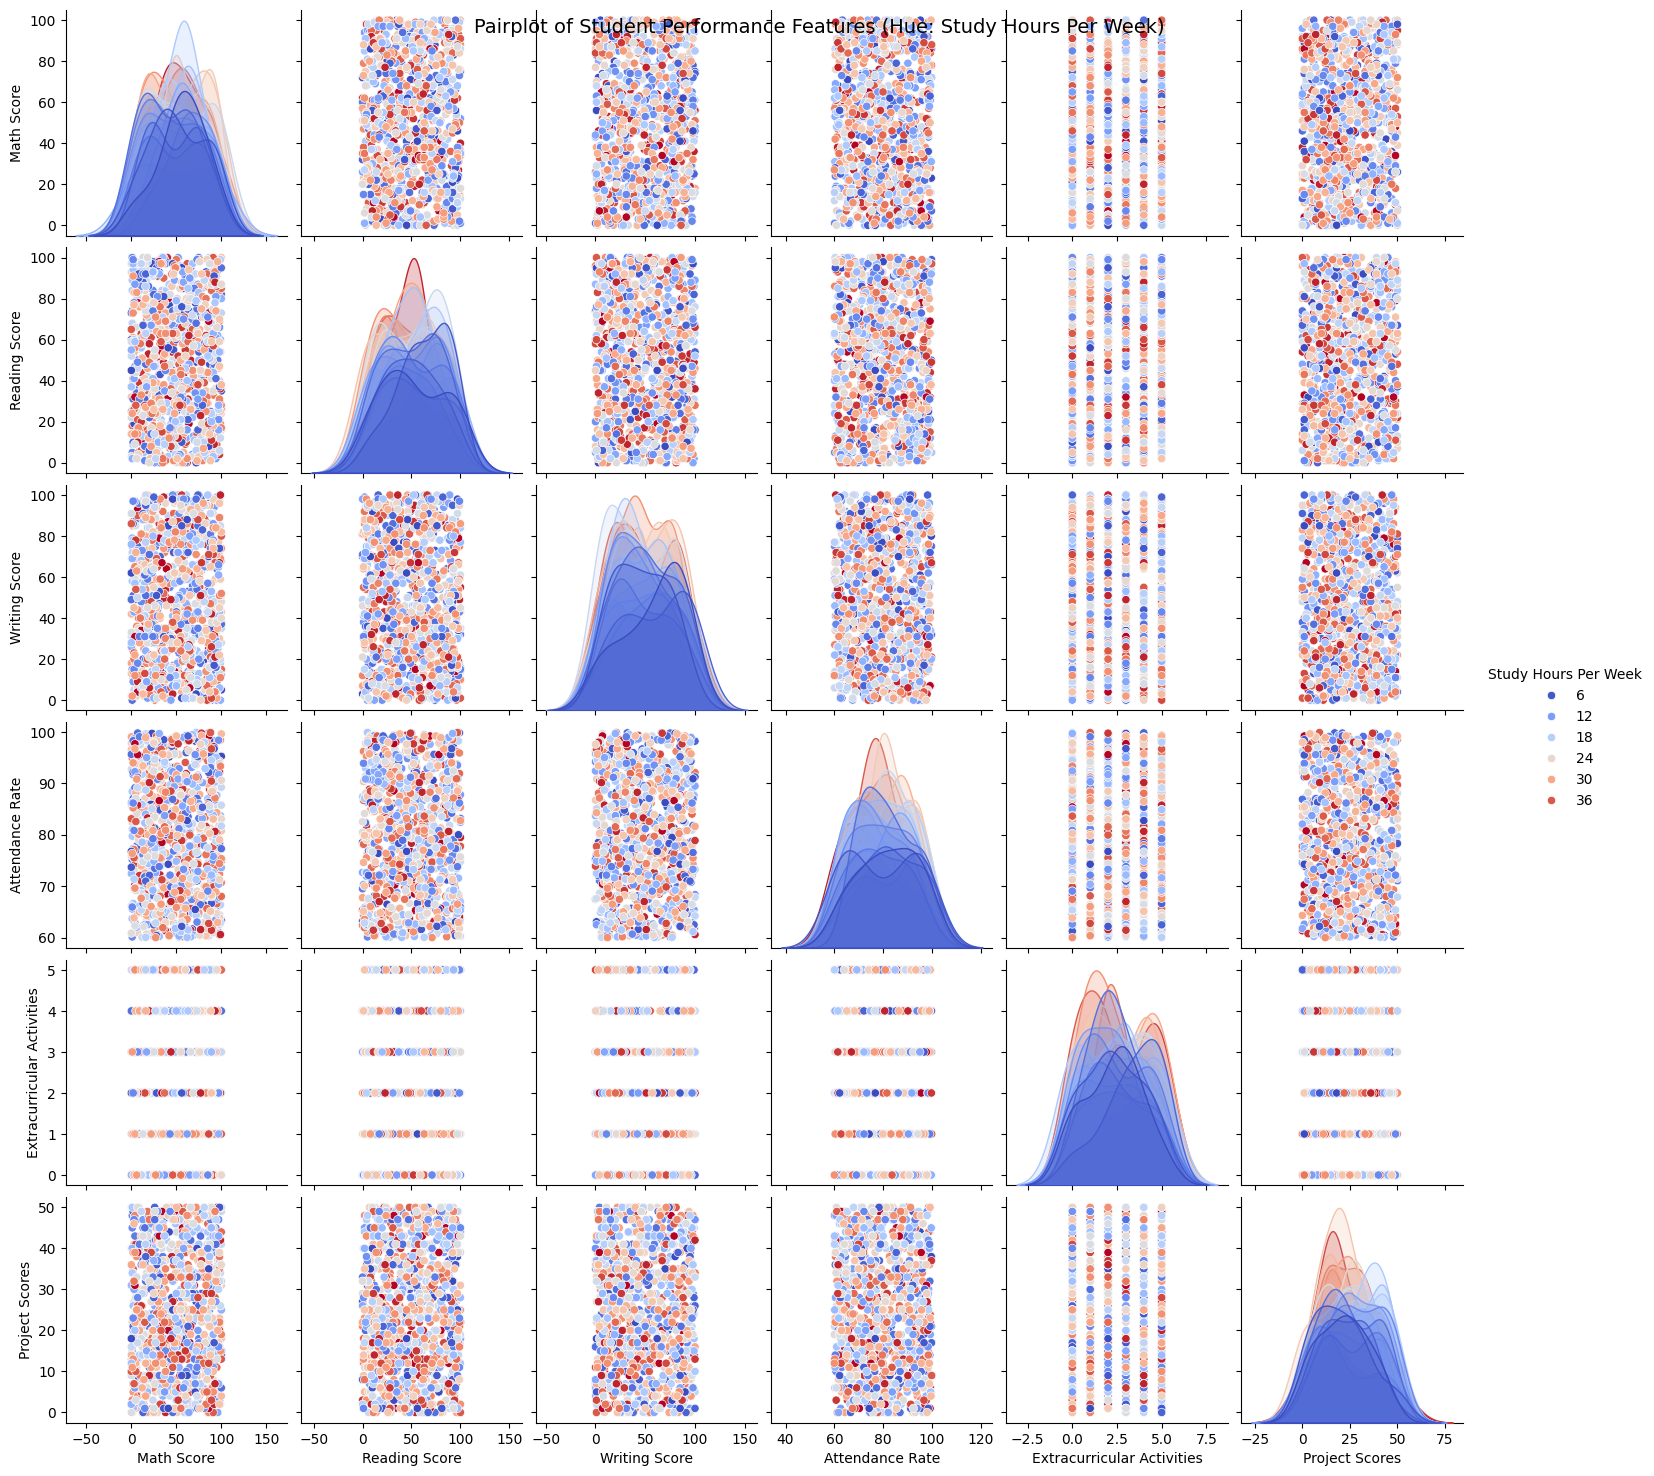

In [53]:
# Plotting pairwise relationships using 'Study Hours Per Week' as hue
sns.pairplot(df, diag_kind="kde", palette="coolwarm", hue="Study Hours Per Week")
plt.suptitle("Pairplot of Student Performance Features (Hue: Study Hours Per Week)", fontsize=14)
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler
scaler = StandardScaler()

# Scaling all numerical features
df_scaled = scaler.fit_transform(df)

# Converting back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Displaying the first few rows after scaling
print("\nFirst 5 rows of the scaled dataset:")
print(df_scaled.head())


First 5 rows of the scaled dataset:
   Math Score  Reading Score  Writing Score  Attendance Rate  \
0    0.036153      -1.275771       1.107429        -1.012532   
1    1.404315       1.126236       1.545363         1.597636   
2   -1.198529      -0.869798      -0.374808        -0.440748   
3    0.703549       0.584939      -0.576931        -0.582398   
4    0.336481      -1.377265      -1.284363        -1.197368   

   Extracurricular Activities  Study Hours Per Week  Project Scores  
0                    0.289601             -1.445056       -1.609162  
1                    0.289601             -1.048605        1.024212  
2                    0.289601              0.636309       -1.539862  
3                    1.449158             -0.553042        0.677716  
4                   -0.290177              1.330097        0.539117  


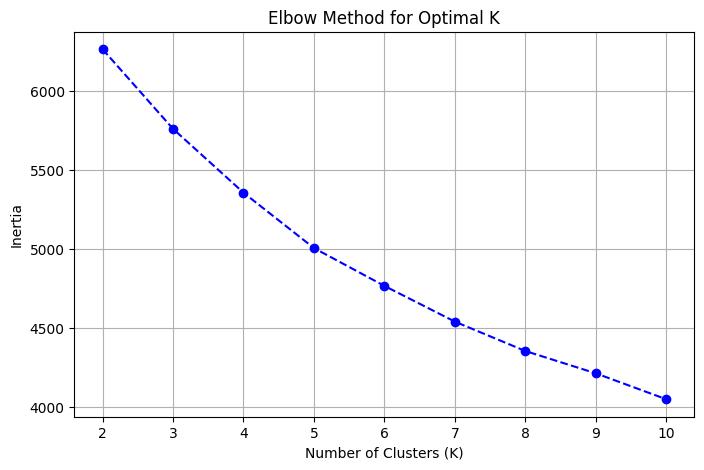

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
inertia = []  # Storing inertia values
k_values = range(2, 11)  # Trying values from 2 to 10 clusters

# Looping through different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o", linestyle="--", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

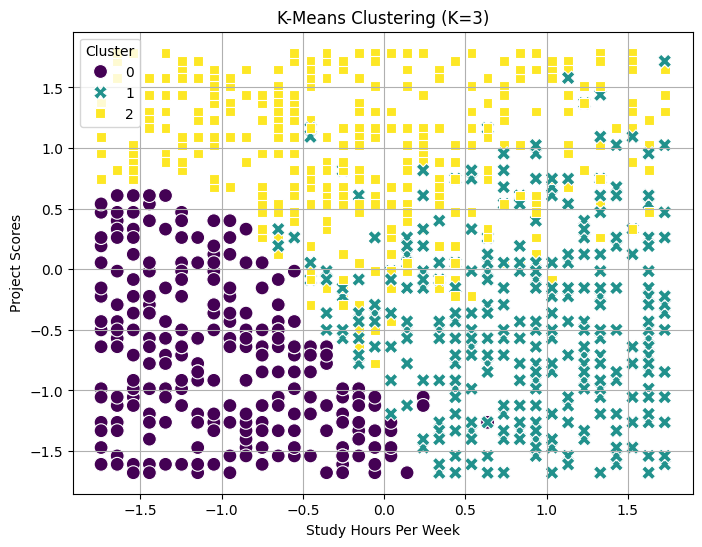

In [74]:
# Applying K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Visualizing K-Means Clustering Results
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_scaled['Study Hours Per Week'],  # Feature 1
    y=df_scaled['Project Scores'],       # Feature 2
    hue=df_scaled['Cluster_KMeans'],
    palette='viridis',
    style=df_scaled['Cluster_KMeans'],
    s=100,
)
plt.title("K-Means Clustering (K=3)")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Project Scores")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

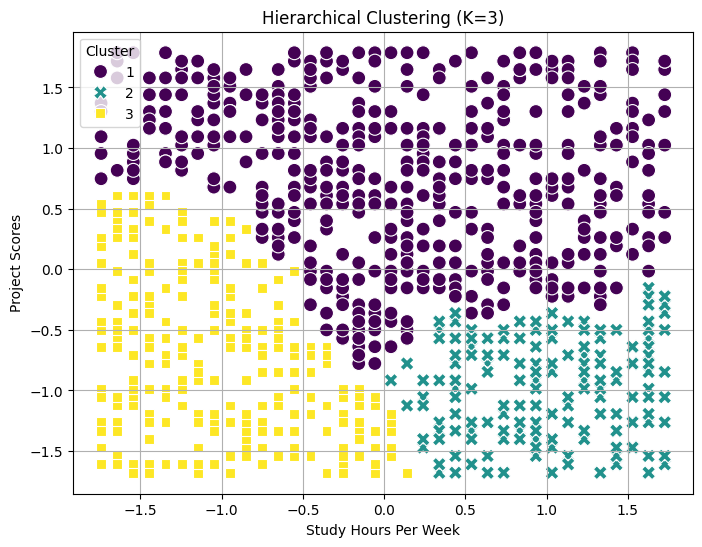

In [57]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Performing Hierarchical Clustering
hierarchical = linkage(df_scaled[['Study Hours Per Week', 'Project Scores']], method='ward')
df_scaled['Cluster_Hierarchical'] = fcluster(hierarchical, 3, criterion='maxclust')

# Visualizing Hierarchical Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_scaled['Study Hours Per Week'],  # Feature 1
    y=df_scaled['Project Scores'],       # Feature 2
    hue=df_scaled['Cluster_Hierarchical'],
    palette='viridis',
    style=df_scaled['Cluster_Hierarchical'],
    s=100,
)
plt.title("Hierarchical Clustering (K=3)")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Project Scores")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [76]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Scores
silhouette_kmeans = silhouette_score(df_scaled[['Study Hours Per Week', 'Project Scores']], df_scaled['Cluster_KMeans'])
silhouette_hierarchical = silhouette_score(df_scaled[['Study Hours Per Week', 'Project Scores']], df_scaled['Cluster_Hierarchical'])

print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.2f}")

Silhouette Score for K-Means: 0.33
Silhouette Score for Hierarchical Clustering: 0.34



Cluster Distribution (K-Means):
Cluster_KMeans
2    378
1    364
0    265
Name: count, dtype: int64

Cluster Distribution (Hierarchical):
Cluster_Hierarchical
1    535
3    262
2    210
Name: count, dtype: int64


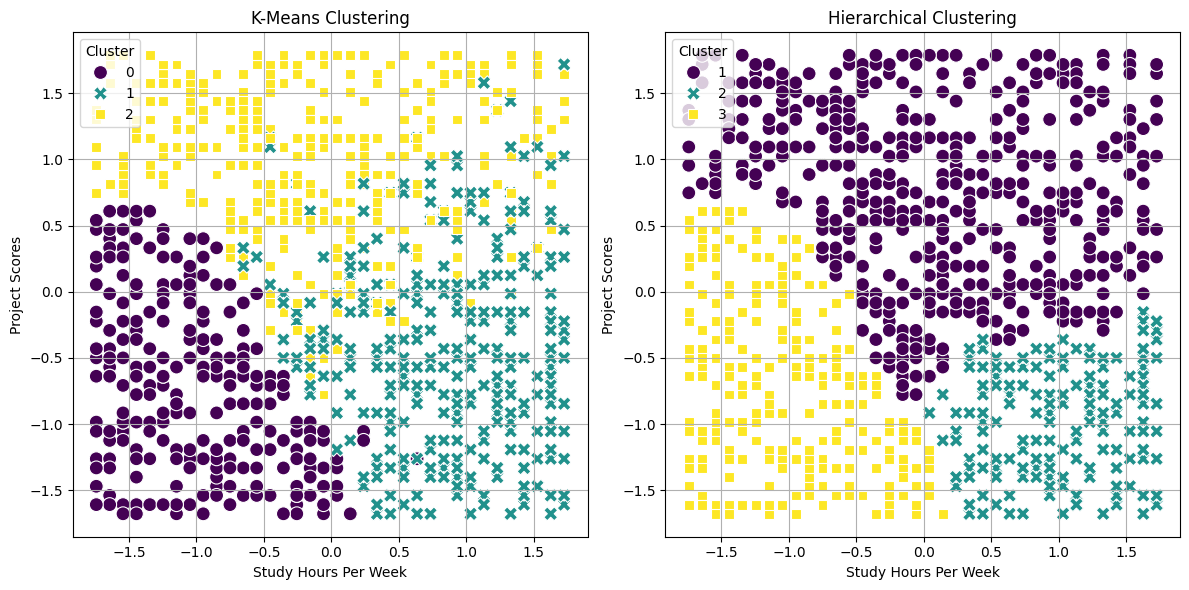

In [78]:
# Cluster Distributions
print("\nCluster Distribution (K-Means):")
print(df_scaled['Cluster_KMeans'].value_counts())

print("\nCluster Distribution (Hierarchical):")
print(df_scaled['Cluster_Hierarchical'].value_counts())

# Visualize Clustering Side by Side
plt.figure(figsize=(12, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=df_scaled['Study Hours Per Week'], 
    y=df_scaled['Project Scores'], 
    hue=df_scaled['Cluster_KMeans'], 
    palette='viridis', 
    style=df_scaled['Cluster_KMeans'], 
    s=100
)
plt.title("K-Means Clustering")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Project Scores")
plt.legend(title="Cluster")
plt.grid(True)

# Hierarchical Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=df_scaled['Study Hours Per Week'], 
    y=df_scaled['Project Scores'], 
    hue=df_scaled['Cluster_Hierarchical'], 
    palette='viridis', 
    style=df_scaled['Cluster_Hierarchical'], 
    s=100
)
plt.title("Hierarchical Clustering")
plt.xlabel("Study Hours Per Week")
plt.ylabel("Project Scores")
plt.legend(title="Cluster")
plt.grid(True)

plt.tight_layout()
plt.show()
